# Demo 1: A* Search for Shortest Path in Romania Map

## Step 1: Import Libraries

In [12]:
#Libraries: pandas, pyplot, heapq, numpy, networkx
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import numpy as np
import networkx as nx

## Step 2: Read Datas

Read the .csv file, to get the x and y coordinate, and the matrix

In [13]:
#coordinates
df_cities = pd.read_csv("./data/cities_coordinates.csv")
print(df_cities.head())

  LocationName  LocationX  LocationY
0         Arad         91        492
1    Bucharest        400        327
2      Craiova        253        288
3      Drobeta        165        299
4       Eforie        562        293


In [14]:
#matrix
df_matrix = pd.read_csv("./data/cities_correlation_matrix.csv")
print(df_matrix.head())

   City Name  Arad  Bucharest  Craiova  Drobeta  Eforie  Fagaras  Giurgiu  \
0       Arad     0          0        0        0       0        0        0   
1  Bucharest     0          0        0        0       0      211       90   
2    Craiova     0          0        0      120       0        0        0   
3    Drobeta     0          0      120        0       0        0        0   
4     Eforie     0          0        0        0       0        0        0   

   Hirsova  Iasi  ...  Mehadia  Neamt  Oradea  Pitesti  Rimnicu  Sibiu  \
0      0.0     0  ...        0      0       0        0        0    140   
1      0.0     0  ...        0      0       0      101        0      0   
2      0.0     0  ...        0      0       0      138      146      0   
3      0.0     0  ...       75      0       0        0        0      0   
4     86.0     0  ...        0      0       0        0        0      0   

   Timisoara  Urziceni  Vaslui  Zerind  
0        118         0       0      75  
1         

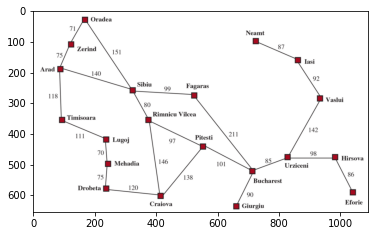

In [15]:
#image
img = plt.imread("./image/Romania-map.PNG")
plt.imshow(img)

Use a dictionary to store cities with locations

In [16]:
#Create dictionary
cities = {}
#Get LocationName, LocationX and LocationY
city_name = df_cities["LocationName"]
locationX = df_cities["LocationX"]
locationY = df_cities["LocationY"]
#use zip() to combine location x and y into (x, y)
location = zip(locationX, locationY)
#use update() to add {name:(x, y)} items into dictionary
for name, coordinate in zip(city_name, location):
    cities.update({name : coordinate})
#view
cities

{'Arad': (91, 492),
 'Bucharest': (400, 327),
 'Craiova': (253, 288),
 'Drobeta': (165, 299),
 'Eforie': (562, 293),
 'Fagaras': (305, 449),
 'Giurgiu': (375, 270),
 'Hirsova': (534, 350),
 'Iasi': (473, 506),
 'Lugoj': (165, 379),
 'Mehadia': (168, 339),
 'Neamt': (406, 537),
 'Oradea': (131, 571),
 'Pitesti': (320, 368),
 'Rimnicu': (233, 410),
 'Sibiu': (207, 457),
 'Timisoara': (94, 410),
 'Urziceni': (456, 350),
 'Vaslui': (509, 444),
 'Zerind': (108, 531)}

Use a list with tuple to store the matrix

In [17]:
#Define the list
neighbours = []

#Store the neighbour tuples into the list
for i in range(df_matrix.shape[0]):
    #x is each line in the matrix
    x = df_matrix.iloc[i, : ]
    #relationKey is the first city's name
    relationKey = x.iloc[0]
    #iterate all city names
    for j in range(1, df_matrix.shape[1]):
        #Find cities which are linked and not a previous city
        if j > i and x.iloc[j] != 0:
            temp = (relationKey, df_matrix.columns[j], int(x. iloc[j]))
            neighbours.append(temp)
#Show
neighbours

[('Arad', 'Sibiu', 140),
 ('Arad', 'Timisoara', 118),
 ('Arad', 'Zerind', 75),
 ('Bucharest', 'Fagaras', 211),
 ('Bucharest', 'Giurgiu', 90),
 ('Bucharest', 'Pitesti', 101),
 ('Bucharest', 'Urziceni', 85),
 ('Craiova', 'Drobeta', 120),
 ('Craiova', 'Pitesti', 138),
 ('Craiova', 'Rimnicu', 146),
 ('Drobeta', 'Mehadia', 75),
 ('Eforie', 'Hirsova', 86),
 ('Fagaras', 'Sibiu', 99),
 ('Hirsova', 'Urziceni', 98),
 ('Iasi', 'Neamt', 87),
 ('Iasi', 'Vaslui', 92),
 ('Lugoj', 'Mehadia', 70),
 ('Lugoj', 'Timisoara', 111),
 ('Oradea', 'Sibiu', 151),
 ('Oradea', 'Zerind', 71),
 ('Pitesti', 'Rimnicu', 97),
 ('Rimnicu', 'Sibiu', 80),
 ('Urziceni', 'Vaslui', 142)]

Transfer into graph

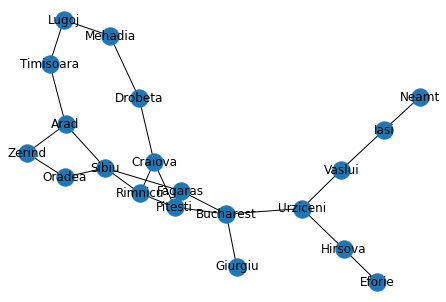

In [18]:
#Construct
graph = nx.Graph()
#Add the neighbours
graph.add_weighted_edges_from(neighbours)
#Show
nx.draw(graph, with_labels = True)

## Step 3: Define the Start and Goal City

In [19]:
#Define the source city
source = "Arad"
print("The source city is: " + source)
#Define the goal city
goal = "Bucharest"
print("The goal city is: " + goal)

The source city is: Arad
The goal city is: Bucharest


## Step 4: Define the Heuristic Function

In [20]:
#This function can get the Euclidean distance between current node and goal city.
def heuristic(node, goal):
    x1, y1 = cities[node]
    x2, y2 = cities[goal]
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

## Step 5: Complete the A* Search Method

In [21]:
def astar(graph, source, goal):
    #Confirm the start and end node
    print("Start node: " + source)
    print("End node: " + goal)
    #frontier is a list with tuples, which stored heuristic value, cost, city name and path
    frontier = [(heuristic(source, goal), 0, source, [source])]
    #a set of visited node
    visited = set()
    #When the queue is not empty, it will pick up the most hopeful node into next search
    while frontier:
        #The prior queue will pop up the most hopeful city to get to the goal city
        #f_cost -> cost with heuristic
        #g_cost -> cost without heuristic
        #node -> current city
        #path -> source city to current city
        f_cost, g_cost, node, path = heapq.heappop(frontier)
        #If reached the goal city, it will return the path
        if node == goal:
            return path, g_cost
        #If the current city is visited, it will skip this node
        if node in visited:
            continue
        #Add the city to visited, because it is a 'set', it can help us find if there is already exist the city we are visiting
        visited.add(node)
        #Iterate the items in graph of neighbours
        for neighbour in graph.neighbors(node):
            #Only process the neighbours which are not visited
            if neighbour not in visited:
                #It means previous cost plus the current city's cost
                #The graph's structure: graph['city1']['city2']['weight'] -> the distance of these two cities
                g_new = g_cost + graph[node][neighbour]['weight']
                #For A*, the cost need to add the heuristic cost, which is the distance of neighbour to goal city
                f_new = g_new + heuristic(neighbour, goal)
                #When the cost is ready, we can add the new node to the queue
                #So the next search will pick up the lowest cost node
                heapq.heappush(frontier, (f_new, g_new, neighbour, path + [neighbour]))
    #If there is no path, it will return none and an infinity distance
    return None, float('inf')

In [22]:
#Output method
path, cost = astar(graph, source, goal)
print("Path: ", path)
print("Cost: ", cost)

Start node: Arad
End node: Bucharest
Path:  ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
Cost:  418


We can check the map to see is the method right.